In [1138]:
import random
import matplotlib.pyplot as plt
import numpy as np


In [1139]:
class UnsupervisedLearning:
    
    def __init__(self):
        self.data_set = []
        self.alpha = 0.001
        random.seed(217) 
        np.random.seed(217) 

    def ex1(self, plot_flag = False):
        mean = [3, 3]
        cov = [[1, 0], [0, 1]]
        a = np.random.multivariate_normal(mean, cov, 500).T
        plt.plot(a[0], a[1], 'x')
        
        mean = [-3, -3]
        cov = [[2, 0], [0, 5]]
        b = np.random.multivariate_normal(mean, cov, 500).T
        plt.plot(b[0], b[1], 'x')
        
        c = np.concatenate((a, b), axis=1)
        c = c.T
        np.random.shuffle(c)
        c = c.T
        x = c[0]
        y = c[1]


        if plot_flag:
            plt.plot(x, y, 'x')
            plt.axis('equal')
            plt.show()
        
        self.data_set = c

    def generate_data(self):
        mean = [3, 3]
        cov = [[1, 0], [0, 1]]
        a = np.random.multivariate_normal(mean, cov, 500).T
        labels_a = np.ones(500)
        a = np.concatenate((a, labels_a.reshape(1, 500)), axis=0)
        
        mean = [-3, -3]
        cov = [[2, 0], [0, 5]]
        b = np.random.multivariate_normal(mean, cov, 500).T
        labels_b = np.ones(500) * 2
        b = np.concatenate((b, labels_b.reshape(1, 500)), axis=0)

        data = np.concatenate((a, b), axis=1)
        r1 = random.choice(data.T)
        r2 = random.choice(data.T)
        for x in data.T:
            if np.linalg.norm(x[:-1] - r1[:-1]) < np.linalg.norm(x[:-1] - r2[:-1]):
                r1 = (1 - self.alpha) * r1 + self.alpha * x
            else:
                r2 = (1 - self.alpha) * r2 + self.alpha * x

        return data, r1, r2

    def adapt_data(self, data, r1, r2):
        r1_values = [r1]
        r2_values = [r2]
        for _ in range(10):
            for x in data.T:
                if np.linalg.norm(x[:-1] - r1[:-1]) < np.linalg.norm(x[:-1] - r2[:-1]):
                    r1 = (1 - self.alpha) * r1 + self.alpha * x
                else:
                    r2 = (1 - self.alpha) * r2 + self.alpha * x

            r1_values.append(r1)
            r2_values.append(r2)

        return r1_values, r2_values
    
    def plot_data(self, data, r1_values, r2_values):
        plt.scatter(data[0, :], data[1, :], alpha= 0.5)

        r1_values = np.array(r1_values)
        r2_values = np.array(r2_values)

        plt.plot(r1_values[:, 0], r1_values[:, 1], 'rx', label='r1 values')
        plt.plot(r2_values[:, 0], r2_values[:, 1], 'bx', label='r2 values')

        plt.legend()
        plt.show()

    def run(self):
        data, r1, r2 = self.generate_data()
        r1_values, r2_values = self.adapt_data(data, r1, r2)
        self.plot_data(data, r1_values, r2_values)

In [1140]:
class UnsupervisedLearning_1b (UnsupervisedLearning):

    def adapt_data(self, data, r1, r2):
        r1_values = np.array([r1])
        r2_values = np.array([r2])
        first_passage_r1 = []
        first_passage_r2 = []
        self.alpha = 0.4
        for iter in range(10):
            distance_to_r1 = []
            distance_to_r2 = []
            for x in data.T:
                d1 = np.linalg.norm(x[:2] - r1[:2])
                d2 = np.linalg.norm(x[:2] - r2[:2])
                if d1 < d2:
                    distance_to_r1.append(x[:2] - r1[:2])
                else:
                    distance_to_r2.append(x[:2] - r2[:2])
            if iter == 0:
                first_passage_r1.append(r1)
                first_passage_r2.append(r2)
            
            distance_to_r1 = np.array(distance_to_r1)
            distance_to_r2 = np.array(distance_to_r2) 

            r1_update = (self.alpha / len(distance_to_r1)) * \
                            np.sum(distance_to_r1, axis=0)
            r2_update = (self.alpha / len(distance_to_r2)) * \
                            np.sum(distance_to_r2, axis=0)

            r1[:2] = r1[:2] + r1_update
            r2[:2] = r2[:2] + r2_update

            r1_values = np.vstack((r1_values, r1))
            r2_values = np.vstack((r2_values, r2))

        return r1_values, r2_values

    def plot_data(self, data, r1_values, r2_values):
        plt.scatter(data[0, :], data[1, :], alpha =0.5)

        r1_values = np.array(r1_values)
        r2_values = np.array(r2_values)

        # Plot the consecutive positions of r1 and r2
        plt.plot(r1_values[:, 0], r1_values[:, 1], 'rx', label='r1 path')
        plt.plot(r2_values[:, 0], r2_values[:, 1], 'bx', label='r2 path')

        plt.legend()
        plt.show()

    def plot_clusters(self, data, r1_values, r2_values):
        import matplotlib.patches as mpatches

        r1 = r1_values[-1]
        r2 = r2_values[-1]

        colors = ['r', 'g', 'b', 'y', 'c', 'm']
        labels = ['points closer to r1 labeled 1', 'points closer to r1 labeled 2',
                  'points closer to r2 labeled 1', 'points closer to r2 labeled 2',
                  'centroid r1', 'centroid r2']

        patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]

        for x in data.T:
            if np.linalg.norm(x[:-1] - r1[:-1]) < np.linalg.norm(x[:-1] - r2[:-1]):
                if x[-1] == 1:
                    plt.plot(x[0], x[1], colors[0]+'o')
                else:
                    plt.plot(x[0], x[1], colors[1]+'o')
            else:
                if x[-1] == 1:
                    plt.plot(x[0], x[1], colors[2]+'o')
                else:
                    plt.plot(x[0], x[1], colors[3]+'o')

        plt.plot(r1[0], r1[1], colors[4]+'x')
        plt.plot(r2[0], r2[1], colors[5]+'x')

        plt.legend(handles=patches)
        plt.show()


    def run(self):
        data, r1, r2 = self.generate_data()
        r1_values, r2_values = self.adapt_data(data, r1, r2)
        self.plot_data(data, r1_values, r2_values)
        self.plot_clusters(data, r1_values, r2_values)

    def repeat_experiment(self):
            final_r1_values = []
            final_r2_values = []

            for _ in range(30):
                data, r1, r2 = self.generate_data()
                r1_values, r2_values = self.adapt_data(data, r1, r2)
                final_r1 = r1_values[-1]
                final_r2 = r2_values[-1]
                final_r1_values.append(final_r1)
                final_r2_values.append(final_r2)

            final_r1_values = np.array(final_r1_values)
            final_r2_values = np.array(final_r2_values)

            plt.scatter(data[0, :], data[1, :], alpha=0.5)

            plt.scatter(final_r1_values[:, 0], final_r1_values[:, 1], color='r', label='final values of r1')
            plt.scatter(final_r2_values[:, 0], final_r2_values[:, 1], color='b', label='final values of r2')
            plt.legend()
            plt.show()

In [1141]:
class AHC():
    SAMPLES_NUM = 100

    def __init__(self):
        self.data = self.generate_data()
        self.clusters = None

    def generate_data(self):
        mean = [3, 3]
        cov = [[1, 0], [0, 1]]
        a = np.random.multivariate_normal(mean, cov, self.SAMPLES_NUM).T

        mean = [-3, -3]
        cov = [[2, 0], [0, 5]]
        b = np.random.multivariate_normal(mean, cov, self.SAMPLES_NUM).T

        c = np.concatenate((a, b), axis=1)
        c = c.T
        np.random.shuffle(c)
        return c

    def agh_function(self):
        points = self.data.copy()
        while len(points)>2:
            min_dist = np.inf
            closest_points = None
            for i in range(len(points)):
                for j in range(i+1, len(points)):
                    distance = np.linalg.norm(points[i]-points[j])
                    if distance < min_dist:
                        min_dist = distance
                        closest_points = (i, j)

            i, j = closest_points

            merged_point = (points[i] + points[j])/2
            points = np.delete(points, j, axis=0)  
            points = np.delete(points, i, axis=0)
            points = np.vstack([points, merged_point])
            if len(points)%50 == 0 or (len(points) < 50 and len(points)%10==0):
                self.plot_clusters(points) 

        self.clusters = points

    def plot_clusters(self, points):
        x = points.T[0]
        y = points.T[1]
        plt.scatter(x, y, label=f'remaing {len(points)} points')
        plt.legend()
        plt.axis('equal')
        plt.show()

    def plot_final_clusters(self):
        plt.scatter(self.data[:, 0], self.data[:, 1], alpha= 0.5, color='blue')
        plt.scatter(self.clusters[:, 0], self.clusters[:, 1], color='red')
        plt.legend(['data', 'final points'])
        plt.title('Final Clusters')
        plt.show()

    def run(self):
        self.agh_function()
        self.plot_clusters(self.clusters)
        self.plot_final_clusters()


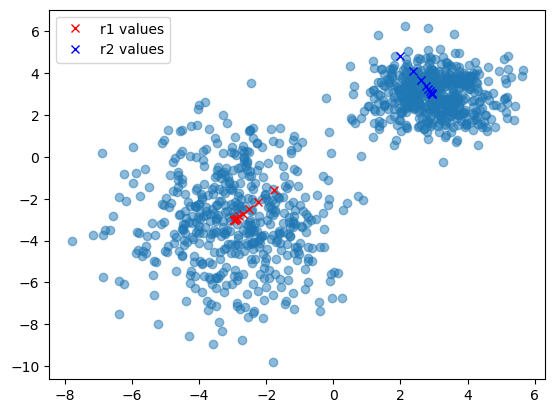

In [1142]:
learner = UnsupervisedLearning()
# learner.ex1(plot_flag= True)
    # a)
learner.run()   

The plot above demonstrates the movement of points r1 and r2 during the initial iteration and subsequent full passes within the generated dataset. It's clear that these points are drawn towards the core of their respective clusters. After 30 iterations, the points settle near these cores, indicating successful identification of the cluster centers. 

We found that the alpha parameter needed to be set higher than initially suggested. An alpha value of 0.00005 was too small, leading to a slow convergence towards the cluster centers. Even after ten iterations, the centers were not pinpointed accurately. The alfa was set to 0.0001, which led to a much faster convergence. The centers were identified after only a few iterations.

There's a noticeable relationship between the final values of r1 and r2 (most common) and the parameters used to generate the dataset. The coordinates of r1 and r2 are strikingly similar to the mean values used in the dataset generation function. 

The final values of r1 and r2 are also dependent on the number of iterations. The more iterations, the closer the points are to the cluster centers. This is expected, as the points are drawn towards the cluster centers during each iteration.

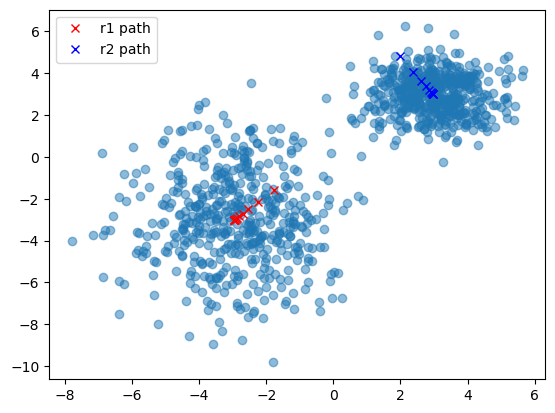

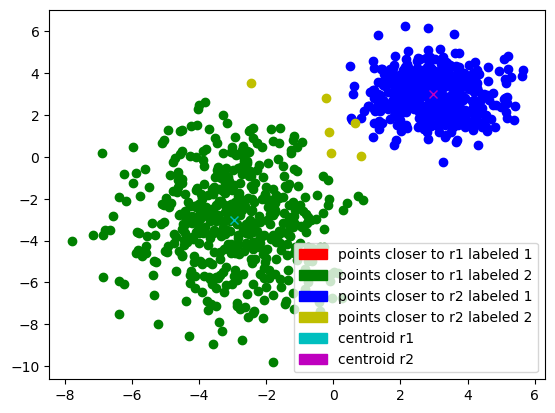

In [1143]:
 # b)
learner = UnsupervisedLearning_1b()
learner.run()

The first plot shows results for the consecutive positions of r1 and r2. We clearly see that points are drawn towards the cluster centers during each iteration. The points are drawn towards the cluster centers during each iteration. between point a and b in exercise 1, both points are drawn towards the cluster center, however the b) solution requires higher alpha value. If value of alpha is equal for both solutions, the a) solution will converge faster.

Nevertheless, both solutions will converge to the same point. The only difference is the number of iterations required to reach the cluster center. It can be adjusted by changing the value of alpha.

The second plot shows the results for the final positions of r1 and r2. The points are drawn towards the cluster centers during each iteration.
The second plots with one colour the points closest to r1 and with another the points closest
to r2.

    - color 1 – points closer to r1 labeled 1;
    - color 2 – points closer to r1 labeled 2;
    - color 3 – points closer to r2 labeled 1;
    - color 4 – points closer to r2 labeled 2.

The plot shows that the points are correctly labeled. The points closer to r1 are labeled 1 and the points closer to r2 are labeled 2.
We can observe that not many points were mislabeled. That is highly dependent on starting poinst of centroids. However, there are just a few which does not fit the proper cluster. with this exact seed it is only 6 points and all of them are on the border of clusters.

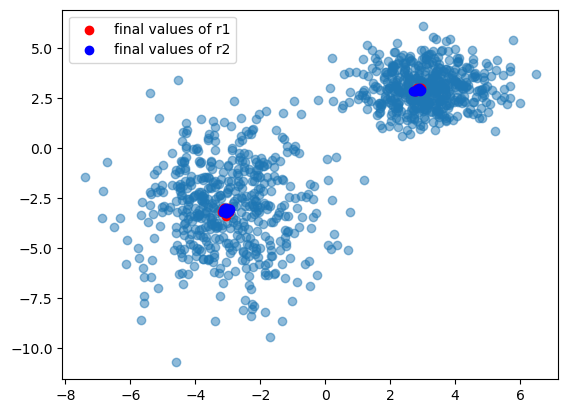

In [1144]:
learner.repeat_experiment()

After 30 experiments the results are highly similar. The points are very close to each other. We can se the changes in group, but it its due to the fact, that sometimes algorythm takes the left side as a first cluster and sometimes the right side. 

I think the results are satisfactory. Those results shows that the algorythm is working properly. Every time it finds the cluster centers and labels the points correctly. 

***Exercise 2***

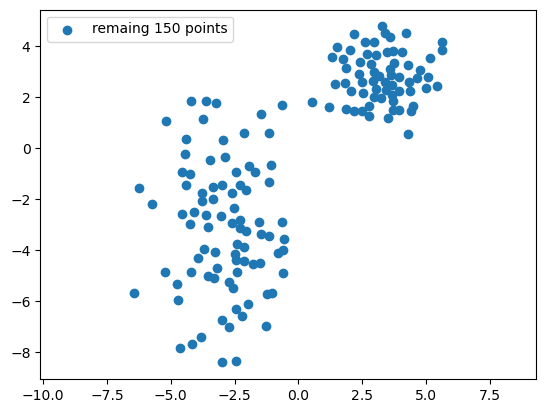

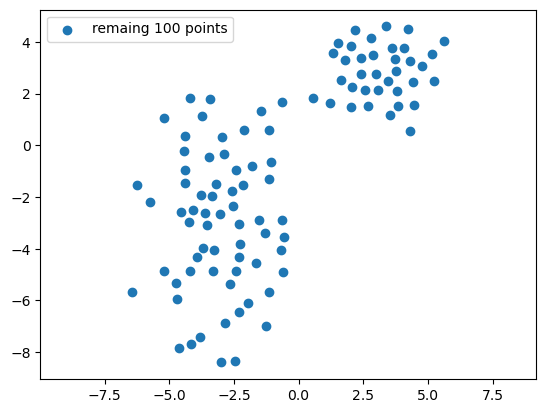

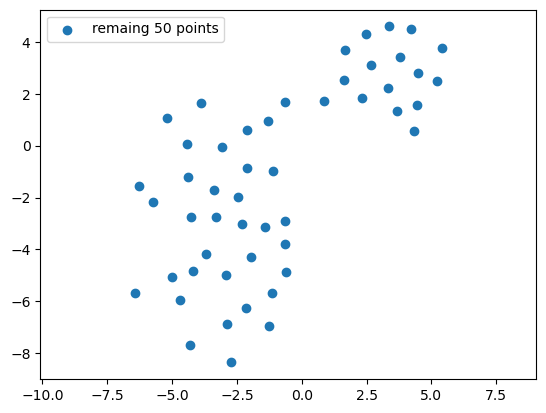

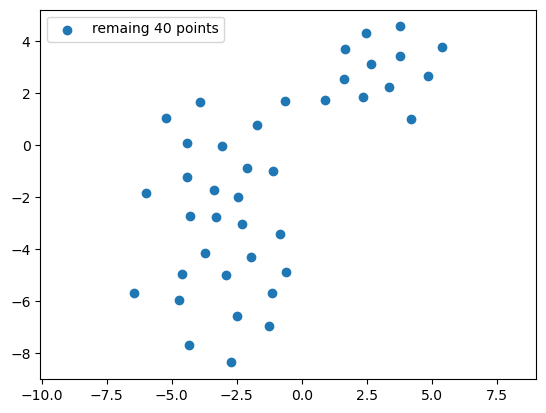

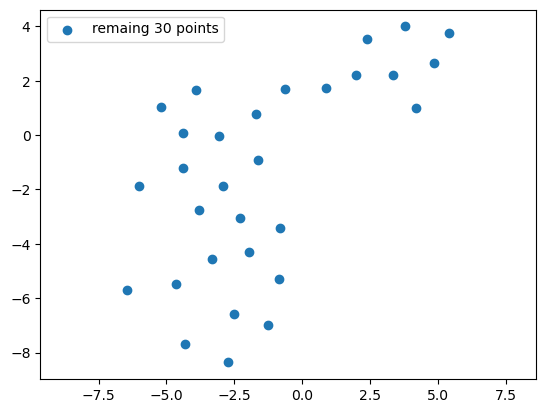

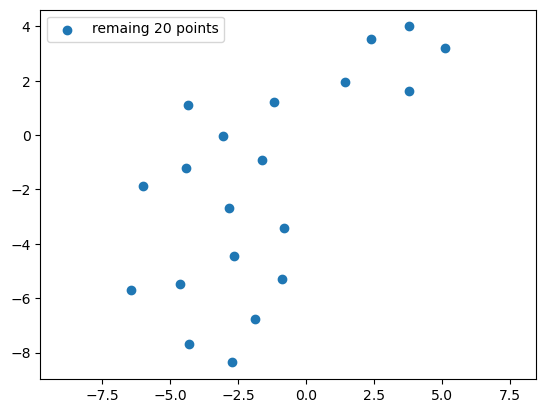

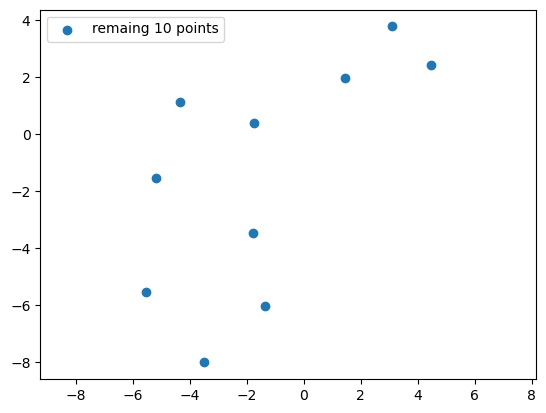

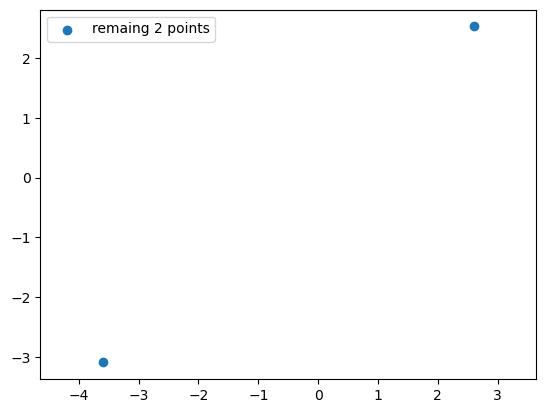

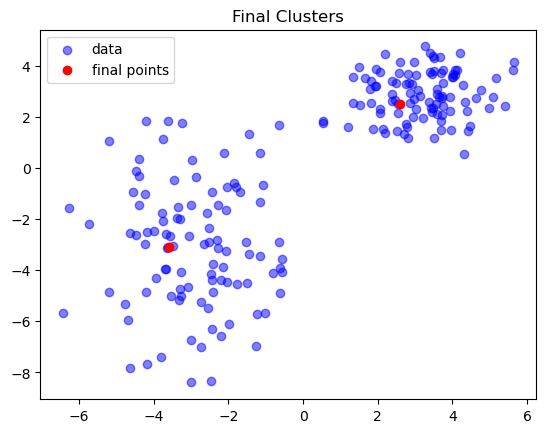

In [1145]:
# Exercise 2
np.random.seed(217) 
ahc = AHC()
ahc.run()


Implementation a simplified version of agglomerative hierarchical clustering seems to work properly. after each iteration we can see that the number of clusters is reduced by one. The algorithm works as expected. At the end we are left with two points which are quite far to each other. and shows the center of the clusters. The algorithm is effective, but it is pretty slow. It is due to the fact that we have to calculate the distance between each point and each cluster and also we use for loops, which in Python are really slow. 

Due to small number of points, the algorithm needs relatively little time. However, if we had more points, the algorithm would be much slower (that the reason why we have a limit of 200 points).



***Exercise 3***

In [1146]:
from sklearn.metrics import euclidean_distances
import matplotlib.patches as mpatches

class DBSCAN:
    def __init__(self, samples_num = 500):
        self.SAMPLES_NUM = samples_num
        self.c = None
        self.final_points = None

    def generate_dataset(self):
        mean = [3, 3]
        cov = [[1, 0], [0, 1]]
        a = np.random.multivariate_normal(mean, cov, self.SAMPLES_NUM).T

        mean = [-3, -3]
        cov = [[2, 0], [0, 5]]
        b = np.random.multivariate_normal(mean, cov, self.SAMPLES_NUM).T

        c = np.concatenate((a, b), axis=1)
        c = c.T
        np.random.shuffle(c)
        c = c.T
        c_labeled = np.vstack((c, np.full(self.SAMPLES_NUM * 2, 0)))  # 0 for not visited
        self.c = c_labeled

    def dbscan(self, eps=0.5, min_samples=5):
        points = self.c.copy().T
        cluster_id = 1
        not_visited_ids = [i for i in range(len(points)) if points[i][2] == 0]
        while len(not_visited_ids) > 0:
            center_idx = np.random.choice(not_visited_ids)
            neighbors = self.range_query(points[:, :2], center_idx, eps)
            if len(neighbors) < min_samples:
                points[center_idx][2] = -1  # noise
            else:
                points[center_idx][2] = cluster_id
                for neighbor in neighbors:
                    if points[neighbor][2] <= 0:
                        points[neighbor][2] = cluster_id
                        neighbor_neighbors = self.range_query(points[:, :2], neighbor, eps)
                        neighbors.extend(n for n in neighbor_neighbors if n not in neighbors)
                cluster_id += 1
                self.plot_clusters(points)

            not_visited_ids = [i for i in range(len(points)) if points[i][2] == 0]

        self.final_points = points

    def range_query(self, X, idx, eps):
        dists = euclidean_distances([X[idx]], X)[0]
        neighbors = []
        for i, dist in enumerate(dists):
            if dist <= eps:
                neighbors.append(i)
        return neighbors

    def plot_clusters(self, points):
        def get_label(label):
            if label > 0:
                return f'Cluster {int(label)}'
            elif label == 0:
                return 'Not visited'
            else:
                return 'Noise'

        labels = np.unique(points[:, 2])
        colors = plt.cm.jet(np.linspace(0, 1, len(labels)))
        for i, label in enumerate(labels):
            plt.scatter(points[points[:, 2] == label, 0], points[points[:, 2] == label, 1], color=colors[i])
        patches = [mpatches.Patch(color=colors[i], label=get_label(labels[i])) for i in range(len(labels))]
        plt.legend(handles=patches)
        plt.show()

    def run(self, eps=0.5, min_samples= 21):
        self.generate_dataset()
        self.dbscan(eps, min_samples)
        self.plot_clusters(self.final_points)

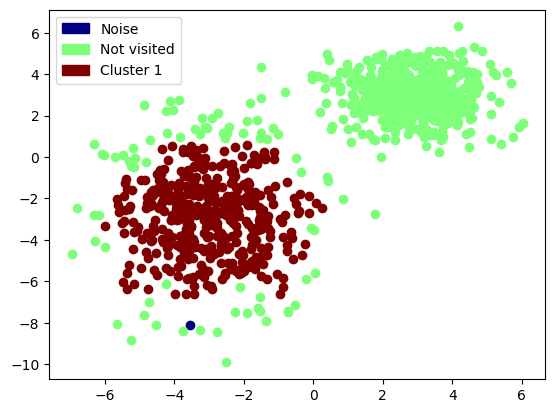

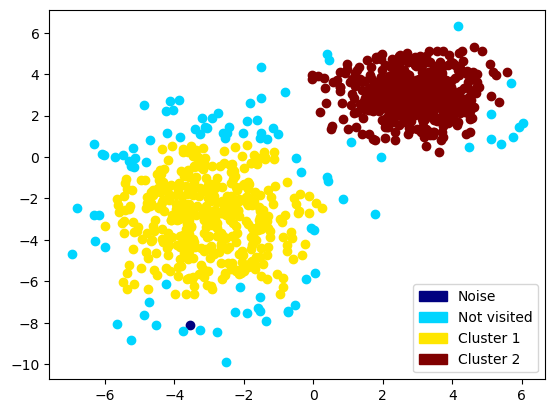

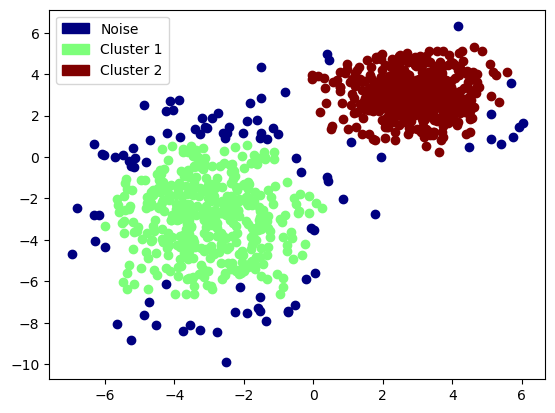

In [1147]:
# Exercise 3
Ex3 = DBSCAN()
Ex3.run()

By changin minimum samples amount we can get different results. After different tries i figured that the minimun samples amount should be around 20-22 to get the best results. If we set it to 10, we get more mislabeled points. If we set it to 30, we get less mislabeled points, but the points are not labeled correctly. the larger minimum samples amount, the more mislabeled points we get and most likely whole grop will be labeled as one, which is obviously not what we wanted to happen.
The small amount would make to many clusters, which is not ideal for as well.

The plot shows that the points are correctly labeled. The points closer to r1 are labeled 1 and the points closer to r2 are labeled 2. We can observe that not many points were mislabeled. That is highly dependent on starting poinst of centroids. 